<a href="https://colab.research.google.com/github/Rushvil/ALY6110_Module4_Practice-With-Spark/blob/main/ALY6110_Module4_Rushvil_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [ ]:
import pandas as pd

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


{'Admission_Predict.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit \r\n1,337,118,4,4.5,4.5,9.65,1,0.92\r\n2,324,107,4,4,4.5,8.87,1,0.76\r\n3,316,104,3,3,3.5,8,1,0.72\r\n4,322,110,3,3.5,2.5,8.67,1,0.8\r\n5,314,103,2,2,3,8.21,0,0.65\r\n6,330,115,5,4.5,3,9.34,1,0.9\r\n7,321,109,3,3,4,8.2,1,0.75\r\n8,308,101,2,3,4,7.9,0,0.68\r\n9,302,102,1,2,1.5,8,0,0.5\r\n10,323,108,3,3.5,3,8.6,0,0.45\r\n11,325,106,3,3.5,4,8.4,1,0.52\r\n12,327,111,4,4,4.5,9,1,0.84\r\n13,328,112,4,4,4.5,9.1,1,0.78\r\n14,307,109,3,4,3,8,1,0.62\r\n15,311,104,3,3.5,2,8.2,1,0.61\r\n16,314,105,3,3.5,2.5,8.3,0,0.54\r\n17,317,107,3,4,3,8.7,0,0.66\r\n18,319,106,3,4,3,8,1,0.65\r\n19,318,110,3,4,3,8.8,0,0.63\r\n20,303,102,3,3.5,3,8.5,0,0.62\r\n21,312,107,3,3,2,7.9,1,0.64\r\n22,325,114,4,3,2,8.4,0,0.7\r\n23,328,116,5,5,5,9.5,1,0.94\r\n24,334,119,5,5,4.5,9.7,1,0.95\r\n25,336,119,5,4,3.5,9.8,1,0.97\r\n26,340,120,5,4.5,4.5,9.6,1,0.94\r\n27,322,109,5,4.5,3.5,8.8,0,0.76\r\n28,298,98,2,1.5

In [ ]:
df = spark.read.csv('Admission_Predict.csv',inferSchema=True, header=True)

In [ ]:
print((df.count(), len(df.columns)))
df.columns

(400, 9)


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
df.printSchema()

root
 |-- Serial No.: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [ ]:
df.describe().show()

+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|summary|        Serial No.|         GRE Score|      TOEFL Score| University Rating|              SOP|              LOR |              CGPA|           Research|  Chance of Admit |
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|  count|               400|               400|              400|               400|              400|               400|               400|                400|               400|
|   mean|             200.5|          316.8075|           107.41|            3.0875|              3.4|            3.4525| 8.598924999999998|             0.5475|0.7243499999999996|
| stddev|115.61430130683084|11.473646113500488|6.069513777374134|1.1437281298838986|1.00686864145869

In [ ]:
df = df.drop('Serial No.')
df.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|      302|        102|                1|2.0| 1.5| 8.0|       0|             0.5|
|      323|     

In [ ]:
for i in df.columns:
    print(i+':',df[df[i].isNull()].count())

GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR : 0
CGPA: 0
Research: 0
Chance of Admit : 0


In [ ]:
for col in df.columns:
    print('Corellation to chance of admit col for {} is {}'.format(
          col, df.stat.corr('Chance of Admit ',col)))

Corellation to chance of admit col for GRE Score is 0.8026104595903502
Corellation to chance of admit col for TOEFL Score is 0.7915939869351041
Corellation to chance of admit col for University Rating is 0.7112502503917226
Corellation to chance of admit col for SOP is 0.6757318583886724
Corellation to chance of admit col for LOR  is 0.6698887920106943
Corellation to chance of admit col for CGPA is 0.8732890993553003
Corellation to chance of admit col for Research is 0.5532021370190405
Corellation to chance of admit col for Chance of Admit  is 1.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

In [ ]:
df.show(5)

+---------+-----------+-----------------+---+----+----+--------+----------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---------+-----------+-----------------+---+----+----+--------+----------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
+---------+-----------+-----------------+---+----+----+--------+----------------+
only showing top 5 rows



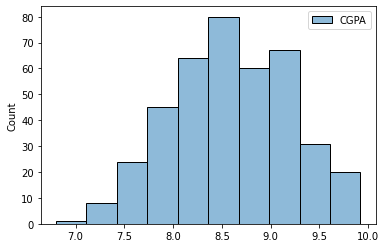

In [ ]:
sns.histplot(df.select('CGPA').toPandas(), bins = 10)

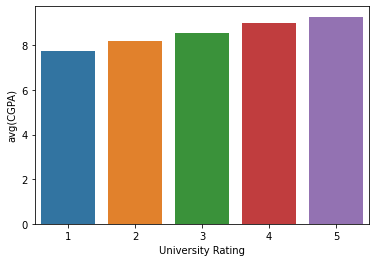

In [ ]:
df_income = df.groupby('University Rating').agg({'CGPA' : 'avg'})
df_pandas_income = df_income.toPandas()
sns.barplot(x = df_pandas_income['University Rating'], y = df_pandas_income['avg(CGPA)'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


+---------------------+---------------------+
|skewness(TOEFL Score)|kurtosis(TOEFL Score)|
+---------------------+---------------------+
|  0.05700113013049667|  -0.5865315512887341|
+---------------------+---------------------+



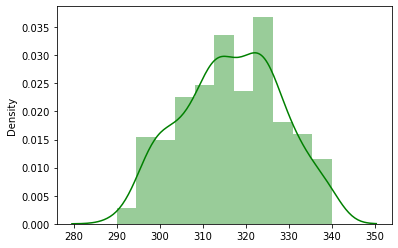

In [ ]:
#Checking normal distribution of selected fetures
#GRE Score

sns.distplot(df.select('GRE Score').toPandas(), color="green")
df.select(F.skewness('GRE Score'), F.kurtosis('GRE Score')).show()

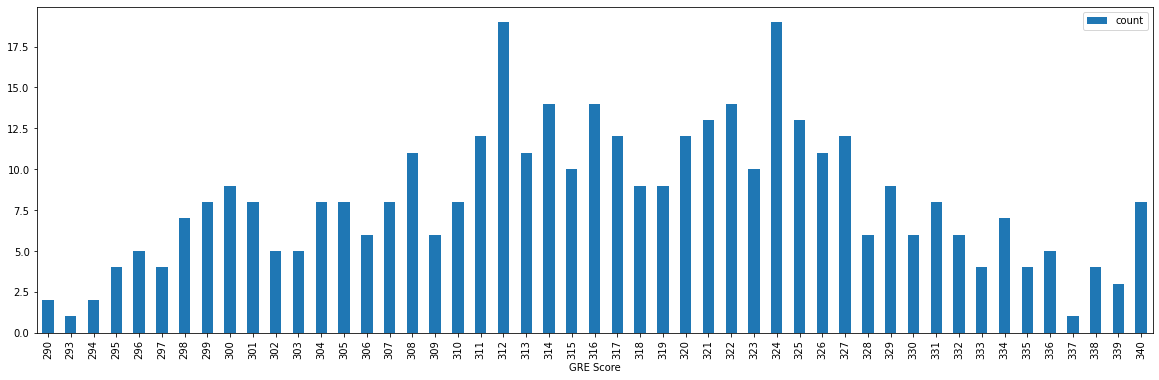

In [ ]:
grescore = df.groupBy("GRE Score").count().sort("GRE Score", ascending= True)
grescore.toPandas().plot.bar(x='GRE Score',figsize=(20, 6))

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['GRE Score','TOEFL Score','CGPA'],
                            outputCol='features')

# display dataframe
output_data = assembler.transform(df)
output_data.show()

+---------+-----------+-----------------+---+----+----+--------+----------------+------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |          features|
+---------+-----------+-----------------+---+----+----+--------+----------------+------------------+
|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|[337.0,118.0,9.65]|
|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|[324.0,107.0,8.87]|
|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72| [316.0,104.0,8.0]|
|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|[322.0,110.0,8.67]|
|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|[314.0,103.0,8.21]|
|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|[330.0,115.0,9.34]|
|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75| [321.0,10

In [ ]:
from pyspark.ml.regression import LinearRegression

final_data = output_data.select('features', 'Chance of Admit ')

# Print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [ ]:
train, test = final_data.randomSplit([0.7, 0.3])

In [ ]:
models = LinearRegression(featuresCol='features',labelCol='Chance of Admit ')
model = models.fit(train)

# Get summary of the model
summary = model.summary

# Print rmse & r2
print('\033[1m' + 'RMSE:',summary.rootMeanSquaredError)
print('R2 score:', summary.r2)
print('MAE score:', summary.meanAbsoluteError)
print('MSE score:', summary.meanSquaredError)

RMSE: 0.06461587413995486
R2 score: 0.7802944000344716
MAE score: 0.047517842263756806
MSE score: 0.004175211190870487


In [ ]:
# Transform on the test data
predictions = model.transform(test)

# Display the predictions
predictions.show(20)

+------------------+----------------+-------------------+
|          features|Chance of Admit |         prediction|
+------------------+----------------+-------------------+
| [294.0,93.0,7.36]|            0.46| 0.4519090667742893|
| [294.0,95.0,7.64]|            0.49| 0.4963432145777915|
| [296.0,95.0,7.54]|            0.44|0.48768927297297404|
|  [296.0,97.0,7.8]|            0.49| 0.5293470993596157|
|[296.0,101.0,7.68]|             0.6| 0.5238204667933708|
| [297.0,96.0,7.43]|            0.34|0.47781616190371334|
| [297.0,96.0,7.89]|            0.43| 0.5416715544914994|
| [297.0,98.0,7.67]|            0.59| 0.5166976668734953|
| [298.0,99.0,7.46]|            0.53|0.49294294871993305|
|[298.0,101.0,7.86]|            0.54| 0.5540350250245969|
| [299.0,94.0,7.34]|            0.42|0.46498473303986776|
| [299.0,96.0,7.86]|            0.54| 0.5427347378456928|
|[299.0,100.0,7.88]|            0.68| 0.5566423551974697|
|[300.0,100.0,8.26]|            0.62| 0.6120062948575566|
|[300.0,104.0,

In [ ]:
# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol='prediction',
                                labelCol='Chance of Admit ',
                                metricName='r2')

print('\033[1m' + 'R2 on the test data:',evaluator.evaluate(predictions)) 

R2 on the test data: 0.7930406494410255


In [ ]:
models = LinearRegression(featuresCol='features',labelCol='Chance of Admit ')
model = models.fit(test)

# Get summary of the model
summary = model.summary

# Print RMSE , R2 , MAE , MSE
print('\033[1m' + 'RMSE:',summary.rootMeanSquaredError)
print('R2 score:', summary.r2)
print('MAE score:', summary.meanAbsoluteError)
print('MSE score:', summary.meanSquaredError)

RMSE: 0.068417629333475
R2 score: 0.7991663366730577
MAE score: 0.04753535517839
MSE score: 0.004680972003612779
